In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import warnings

In [2]:
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
reddit_api_info_nw_insights = pd.read_csv("subreddit_data_info_nw_insights.csv")
print(reddit_api_info_nw_insights.head(5))

           Subreddit                              Subreddit Description  \
0            Animals  The best ANIMALS community anywhere. Photos, v...   
1       FunnyAnimals  Welcome to the subreddit for our funny animal ...   
2  AnimalsBeingDerps   Pictures, gifs and videos of animals being derps   
3          AskReddit  r/AskReddit is the place to ask and answer tho...   
4     AnimalCrossing  Welcome to the Animal Crossing subreddit! The ...   

   Total Subscribers  Average Active Users  Total Post Count  \
0             119004                   NaN                10   
1            4838065                   NaN                10   
2            8377647                   NaN                10   
3           46015515                   NaN                10   
4            2222587                   NaN                10   

   Total Gilded Post Count  Average Score  Average Upvote Ratio  \
0                        1         1561.5                 0.988   
1                        3    

In [4]:
# Descriptive statistics
network_metrics = ['Number of Nodes', 'Number of Edges', 'Average Degree',
                   'Average Network Density', 'Average Degree Centrality',
                   'Average Closeness Centrality', 'Average Betweenness Centrality',
                   'Clustering Coefficient', 'Modularity']


In [5]:
descriptive_stats = reddit_api_info_nw_insights[network_metrics].describe()

print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Number of Nodes  Number of Edges  Average Degree  \
count       105.000000       105.000000      105.000000   
mean       1370.095238      1403.057143        2.028973   
std        1299.226379      1322.767995        0.202627   
min          11.000000         5.000000        0.909091   
25%         220.000000       219.000000        2.010870   
50%         838.000000       891.000000        2.028745   
75%        2639.000000      2710.000000        2.071383   
max        3737.000000      3768.000000        2.793893   

       Average Network Density  Average Degree Centrality  \
count               105.000000                 105.000000   
mean                  0.011345                   0.011345   
std                   0.022916                   0.022916   
min                   0.000540                   0.000540   
25%                   0.000779                   0.000779   
50%                   0.002572                   0.002572   
75%             

In [6]:
# Correlation analysis
network_metrics = reddit_api_info_nw_insights[['Number of Nodes', 'Number of Edges', 'Average Degree',
                   'Average Network Density', 'Average Degree Centrality',
                   'Average Closeness Centrality', 'Average Betweenness Centrality',
                   'Clustering Coefficient', 'Modularity']]

In [7]:
corr_matrix = network_metrics.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

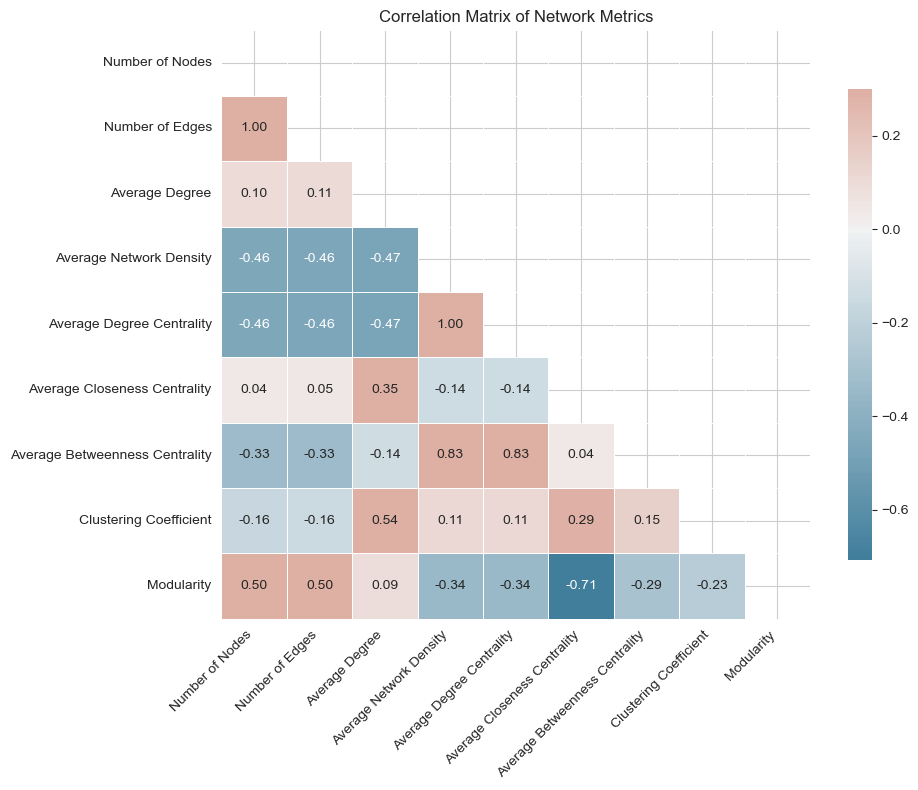

In [8]:
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt=".2f", square=True,
            linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Network Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

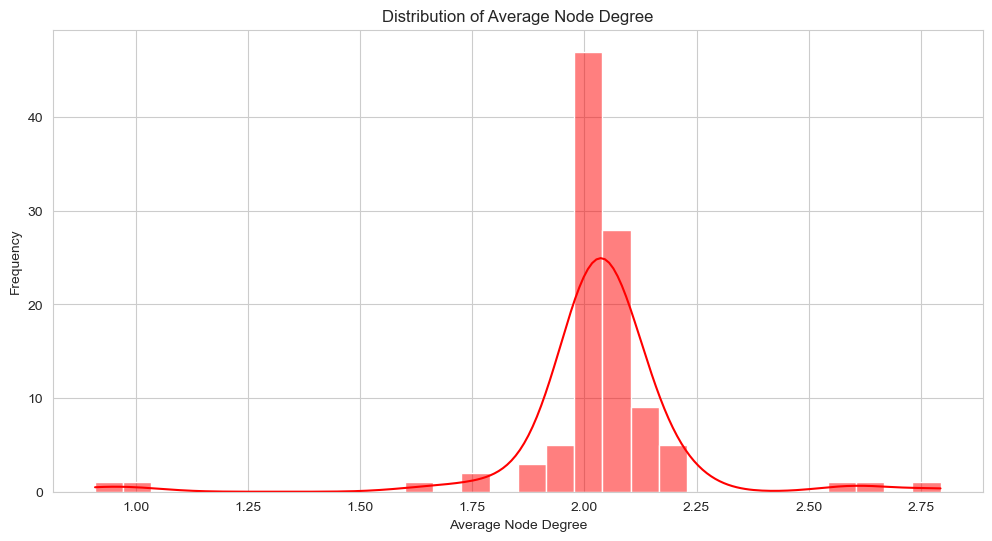

In [9]:
# Distribution analysis of Node Degree across subreddits
plt.figure(figsize=(12, 6))
sns.histplot(reddit_api_info_nw_insights['Average Degree'], bins=30, kde=True, color='red')
plt.title('Distribution of Average Node Degree')
plt.xlabel('Average Node Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
 #Centrality analysis
centrality_metrics = reddit_api_info_nw_insights[['Subreddit', 'Average Degree Centrality',
                                                    'Average Closeness Centrality', 'Average Betweenness Centrality']]

Text(0.5, 1.0, 'Top 20 Subreddits by Degree Centrality')

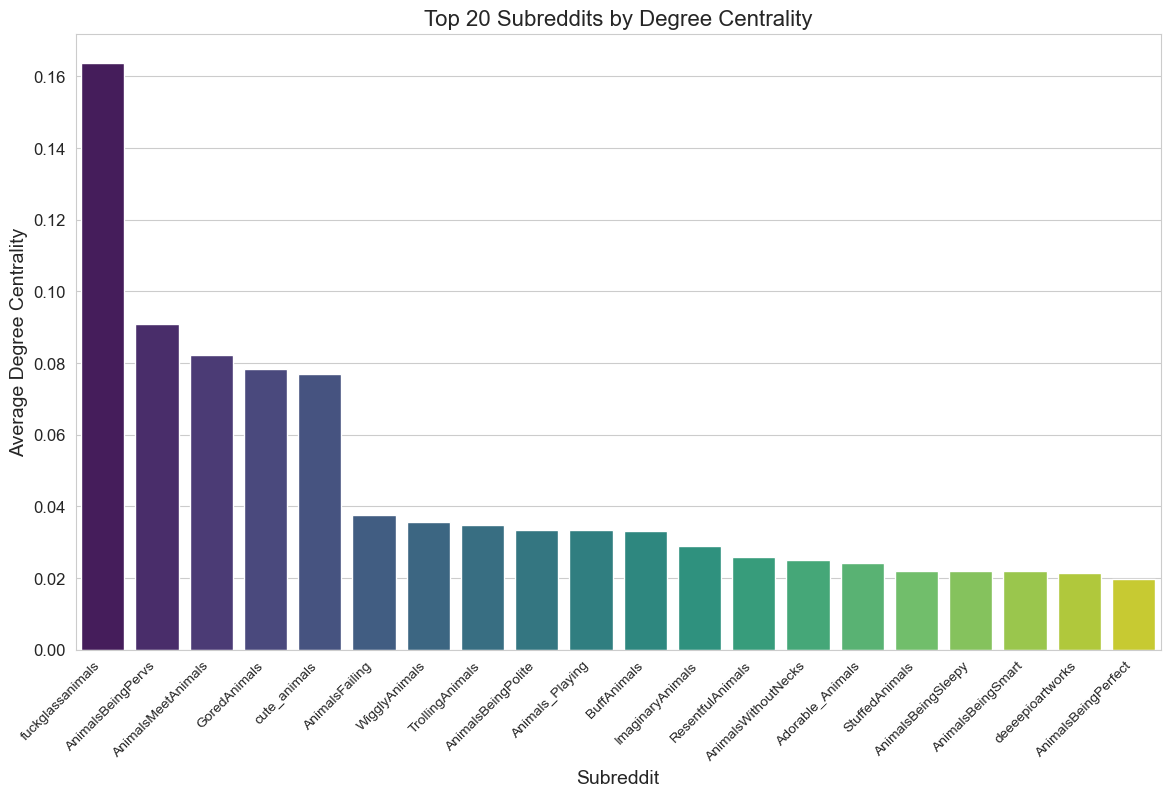

In [11]:
# Degree Centrality
data = reddit_api_info_nw_insights.sort_values('Average Degree Centrality', ascending=False).head(20)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=data, x='Subreddit', y='Average Degree Centrality', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('Subreddit', fontsize=14)
plt.ylabel('Average Degree Centrality', fontsize=14)
plt.title('Top 20 Subreddits by Degree Centrality', fontsize=16)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Top 20 Subreddits by Closeness Centrality')

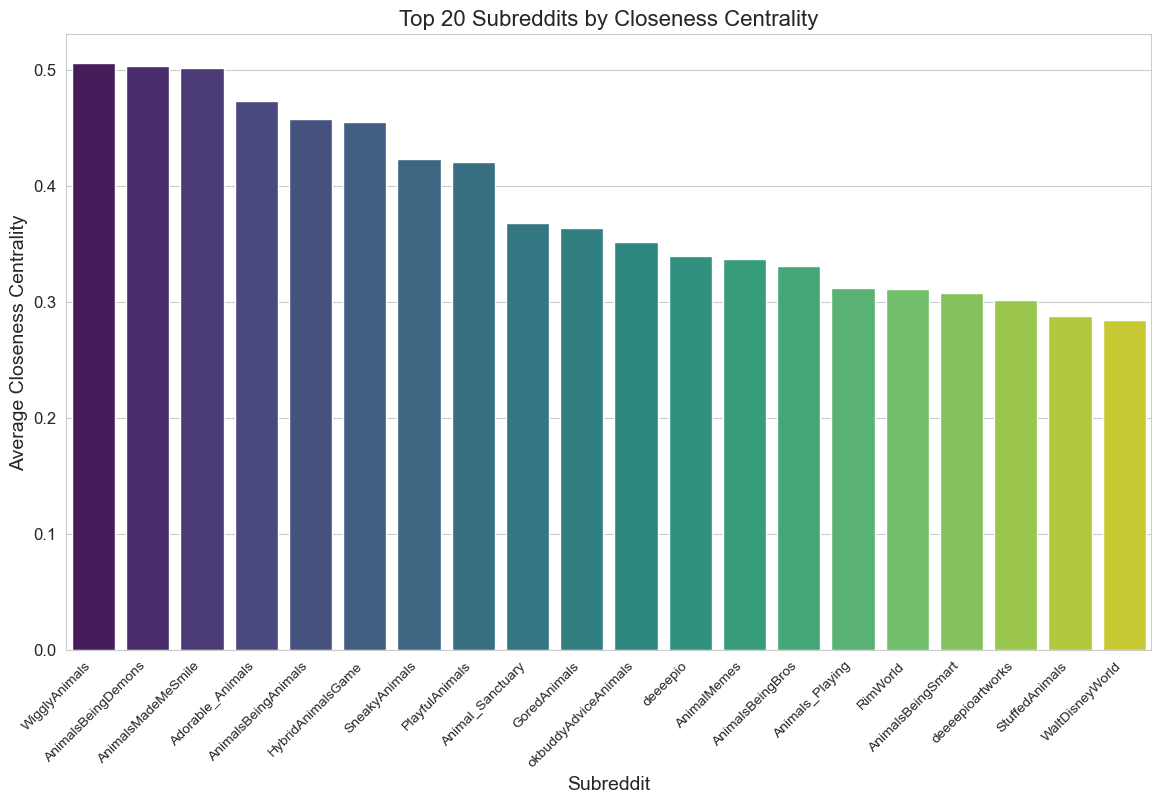

In [12]:
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Closeness Centrality
data = reddit_api_info_nw_insights.sort_values('Average Closeness Centrality', ascending=False).head(20)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=data, x='Subreddit', y='Average Closeness Centrality', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('Subreddit', fontsize=14)
plt.ylabel('Average Closeness Centrality', fontsize=14)
plt.title('Top 20 Subreddits by Closeness Centrality', fontsize=16)

In [13]:
# Betweenness Centrality
data = reddit_api_info_nw_insights.sort_values('Average Betweenness Centrality', ascending=False).head(20)


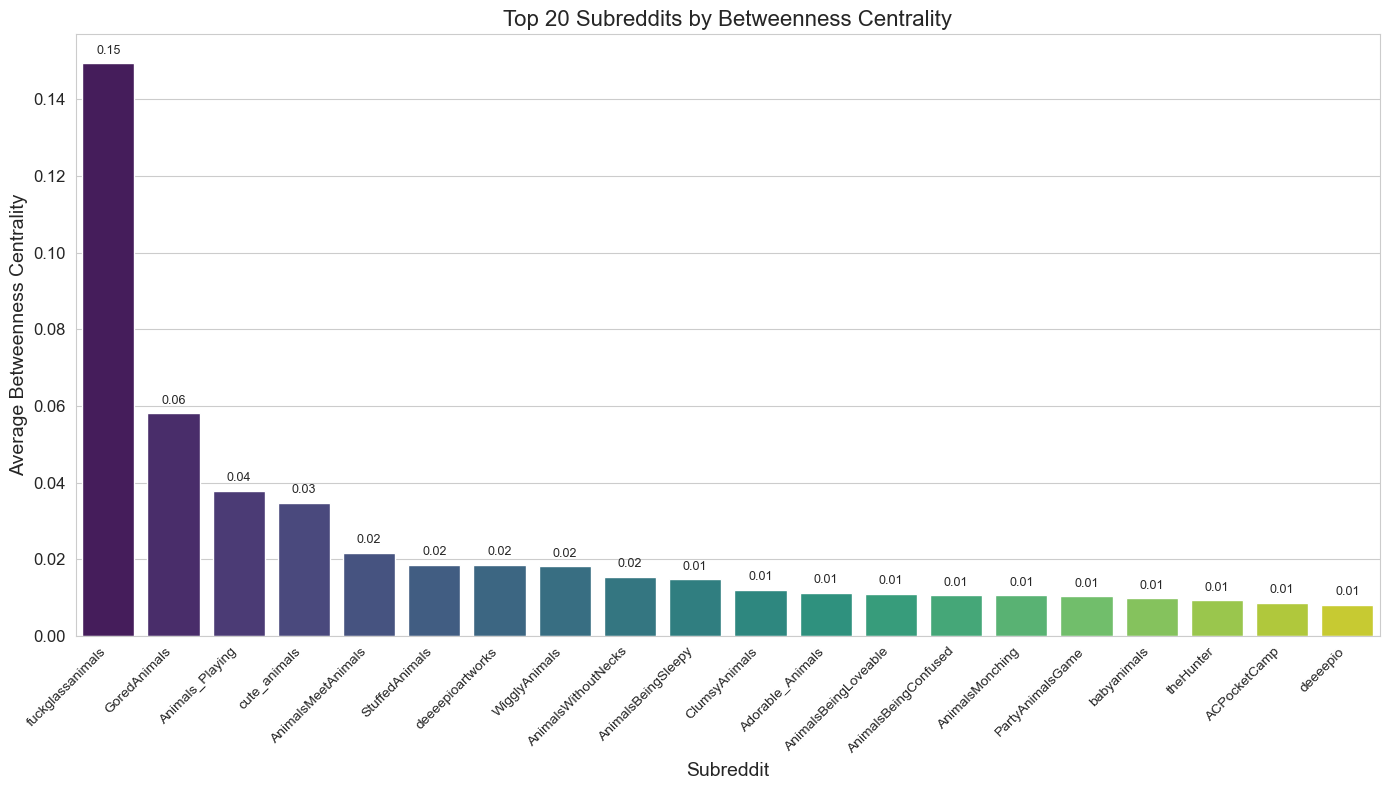

In [14]:
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=data, x='Subreddit', y='Average Betweenness Centrality', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.xlabel('Subreddit', fontsize=14)
plt.ylabel('Average Betweenness Centrality', fontsize=14)
plt.title('Top 20 Subreddits by Betweenness Centrality', fontsize=16)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

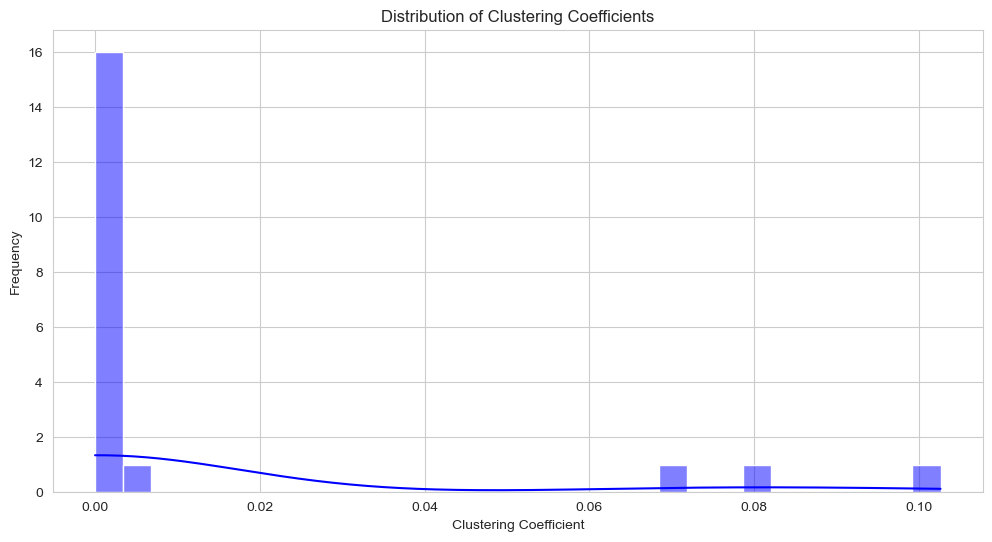

Average Clustering Coefficient: 0.0130


In [15]:
# Clustering coefficient analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['Clustering Coefficient'], bins=30, kde=True, color='blue')
plt.title('Distribution of Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

average_clustering = data['Clustering Coefficient'].mean()
print(f"Average Clustering Coefficient: {average_clustering:.4f}")

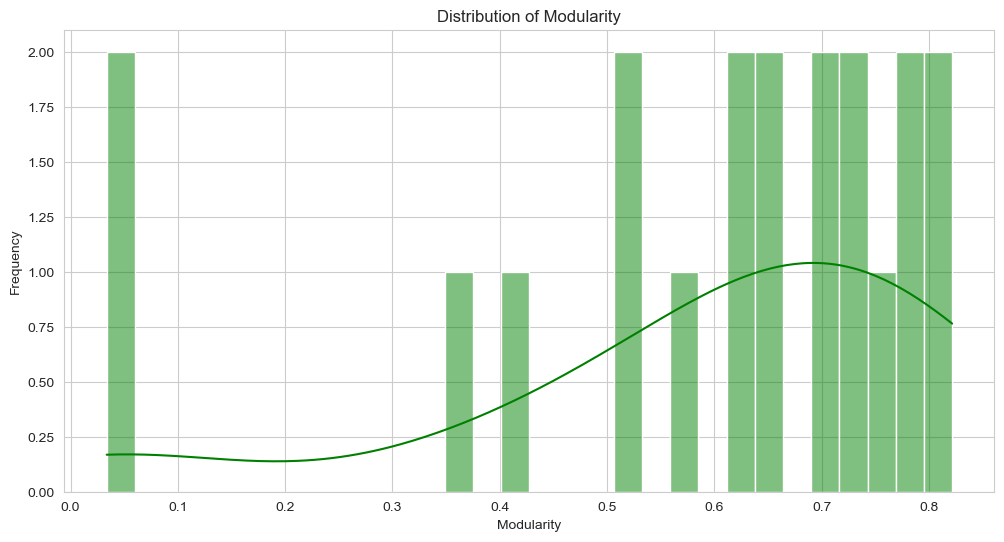

Average Modularity: 0.5911


In [16]:
# Modularity analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['Modularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Modularity')
plt.xlabel('Modularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate average modularity
average_modularity = data['Modularity'].mean()
print(f"Average Modularity: {average_modularity:.4f}")

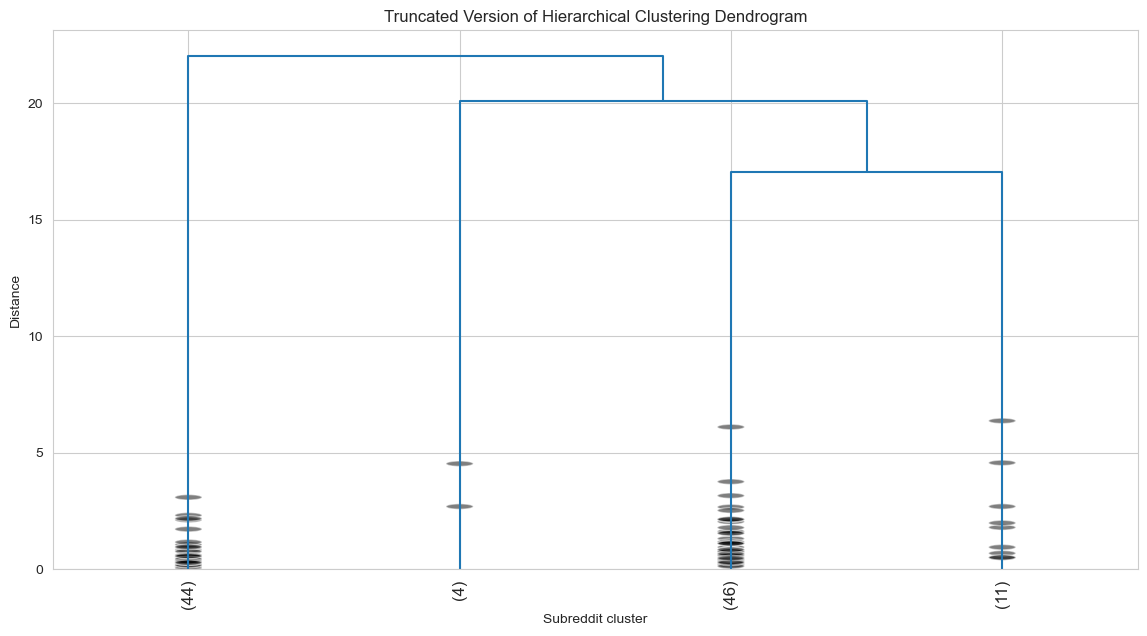

                                                 Subreddit  Number of Nodes  \
Cluster                                                                       
1        [Animals, FunnyAnimals, AnimalsBeingDerps, Ask...      2762.886364   
2        [AnimalsBeingPervs, cute_animals, fuckglassani...        14.500000   
3        [AnimalsBeingStrange, AnimalsOnReddit, veganci...       419.021739   
4        [AnimalsBeingAnimals, HybridAnimalsGame, Sneak...       269.090909   

         Number of Edges  Average Degree  Average Network Density  \
Cluster                                                             
1            2822.272727        2.045834                 0.000801   
2              10.000000        1.318182                 0.103430   
3             433.260870        2.035432                 0.011518   
4             288.272727        2.192981                 0.019315   

         Average Degree Centrality  Average Closeness Centrality  \
Cluster                                   

In [17]:
# Hierarchical clustering analysis
features = reddit_api_info_nw_insights[['Number of Nodes', 'Number of Edges', 'Average Degree',
            'Average Network Density', 'Average Degree Centrality',
            'Average Closeness Centrality', 'Average Betweenness Centrality',
            'Clustering Coefficient', 'Modularity']]

normalized_features = (features - features.mean()) / features.std()

linkage_matrix = linkage(normalized_features, method='ward')

num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
reddit_api_info_nw_insights['Cluster'] = clusters

plt.figure(figsize=(14, 7))
dendrogram(
    linkage_matrix,
    labels=reddit_api_info_nw_insights['Subreddit'].values,
    leaf_rotation=90,
    truncate_mode='lastp',
    p=num_clusters,
    show_contracted=True,
)
plt.title('Truncated Version of Hierarchical Clustering Dendrogram')
plt.xlabel('Subreddit cluster')
plt.ylabel('Distance')
plt.show()

cluster_summary_names = reddit_api_info_nw_insights.groupby('Cluster')['Subreddit'].apply(list)

cluster_summary_metrics = reddit_api_info_nw_insights.groupby('Cluster').agg({
    'Number of Nodes': 'mean',
    'Number of Edges': 'mean',
    'Average Degree': 'mean',
    'Average Network Density': 'mean',
    'Average Degree Centrality': 'mean',
    'Average Closeness Centrality': 'mean',
    'Average Betweenness Centrality': 'mean',
    'Modularity': 'mean'
})

final_cluster_summary = pd.concat([cluster_summary_names, cluster_summary_metrics], axis=1)
print(final_cluster_summary)